In [75]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [76]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [77]:
def GetLaguerre(n, x):
    if n == 0:
        poly = sym.Number(1)
    elif n==1:
        poly = 1-x
    else:
        poly = ((2*(n-1)+1-x)*GetLaguerre(n-1,x)-(n-1)*GetLaguerre(n-2,x))/n
    return sym.expand(poly,x)

In [78]:
def GetDLaguerre(n,x):
    Pn = GetLaguerre(n,x)
    return sym.diff(Pn,x,1)

In [79]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [80]:
def GetRoots(f,df,x,tolerancia = 10):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [81]:
def GetAllRootsGLag (n):
    xn = np.linspace(0,n+(n-1)*np.sqrt(n),100)
    
    Laguerre = []
    DLaguerre = []
    
    for i in range(n+1):
        Laguerre.append(GetLaguerre(i,x))
        DLaguerre.append(GetDLaguerre(i,x))
    
    poly = sym.lambdify([x],Laguerre[n],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots

In [82]:
def GetWeightsGLag(n):

    Roots = GetAllRootsGLag(n)

    Laguerre = []
    
    for i in range(n+2):
        Laguerre.append(GetLaguerre(i,x))
    
    poly = sym.lambdify([x],Laguerre[n+1],'numpy')
    Weights = Roots/((n+1)**2*poly(Roots)**2)
    
    return Weights

In [83]:
def GetHermite(n, x):
    if n == 0:
        poly = sym.Number(1)
    elif n==1:
        poly = x
    else:
        poly = ((2*x)*GetHermite(n-1,x)-2*(n-1)*GetHermite(n-2,x))
    return sym.expand(poly,x)

In [84]:
def GetDHermite(n,x):
    Pn = GetHer(n,x)
    return sym.diff(Pn,x,1)

In [85]:
def GetAllRootsGHer (n):
    xn = np.linspace(-np.sqrt(4*n+1),np.sqrt(4*n+1),100)
    
    Hermite = []
    DHermite = []
    
    for i in range(n+1):
        Hermite.append(GetHermite(i,x))
        DHermite.append(GetDHermite(i,x))
    
    poly = sym.lambdify([x],Hermite[n],'numpy')
    Dpoly = sym.lambdify([x],DHermite[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    if len(Roots) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
    
    return Roots

In [86]:
def GetWeightsGHer(n):

    Roots = GetAllRootsGHer(n)

    Hermite = []
    
    for i in range(n):
        Hermite.append(GetHermite(i,x))
    
    poly = sym.lambdify([x],Hermite[n-1],'numpy')
    Weights = 2**(n-1)*np.math.factorial(n)*np.sqrt(np.pi)/((n)**2*poly(Roots)**2)
    
    return Weights

In [96]:
T = np.linspace(100, 1000, 6)
m = 1
v = np.linspace(0, 700, 2000)
r = 8.314

In [97]:
def P (v, T, M = m, R = r):
    return 4*np.pi*((M/(2*np.pi*R*T))**(3/2))*v**2*np.exp(-(M*v**2)/(2*np.pi*R*T))

Text(0.5, 1.0, 'Probabilidad de que una molécula tenga una velocidad \n dependiendo de la temperatura')

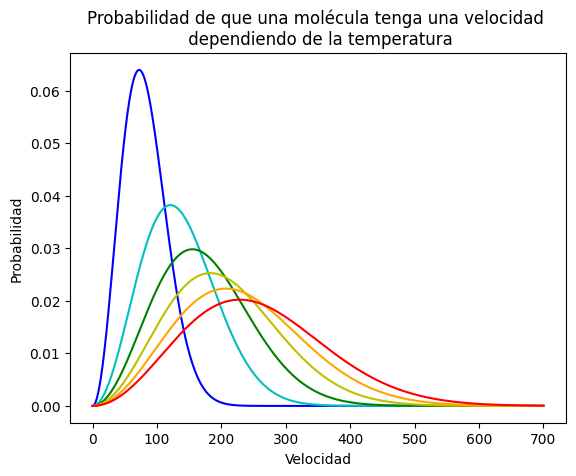

In [98]:
colores = []
for i in T:
    proba = P(v, i)
    if 'b' not in colores:
        plt.plot(v, proba, color = 'b')
        colores.append('b')
    elif 'c' not in colores:
        plt.plot(v, proba, color = 'c')
        colores.append('c')
    elif 'g' not in colores:
        plt.plot(v, proba, color = 'g')
        colores.append('g')
    elif 'y' not in colores:
        plt.plot(v, proba, color = 'y')
        colores.append('y')
    elif 'orange' not in colores:
        plt.plot(v, proba, color = 'orange')
        colores.append('orange')
    else:
        plt.plot(v, proba, color = 'r')
        colores.append('r')
plt.xlabel("Velocidad")
plt.ylabel("Probabilidad")
plt.title("Probabilidad de que una molécula tenga una velocidad \n dependiendo de la temperatura")

Como podemos ver, a mayor temperatura (Visible gracias al cambio de color, azul siendo la más baja y rojo siendo la más alta) mayor la velocidad promedio, pero menor su probabilidad máxima comparada con una temperatura menor. Es decir, a más temperatura, más extenso el rango de velocidades posibles para la partícula